## Observations and Insights 

In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [98]:
# Checking the number of mice.
mice_number = len(combined_mouse_data["Mouse ID"])
mice_number 

1893

In [99]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_mouse_data[combined_mouse_data.duplicated(["Mouse ID","Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [100]:
# Optional: Get all the data for the duplicate mouse ID. 


In [101]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_mouse_data.drop_duplicates(["Mouse ID", "Timepoint"])
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [102]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"])

1888

## Summary Statistics

In [103]:
#List of each regimen
#clean_data["Drug Regimen"].value_counts()

In [104]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var','std','sem' ])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [105]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

In [143]:
# Filter the DataFrame down only to those columns to chart
mice_and_treatment = clean_data.groupby("Drug Regimen").count()["Mouse ID"]
mice_and_treatment

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

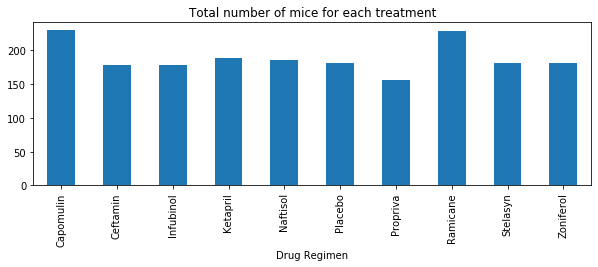

<Figure size 432x288 with 0 Axes>

In [261]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Use DataFrame.plot() in order to create a bar chart of the data
mice_and_treatment.plot(kind="bar", figsize=(10,3))

# Set a title for the chart
plt.title("Total number of mice for each treatment")

plt.show()
plt.tight_layout()


Text(0.5, 1.0, 'Total number of mice for each treatment')

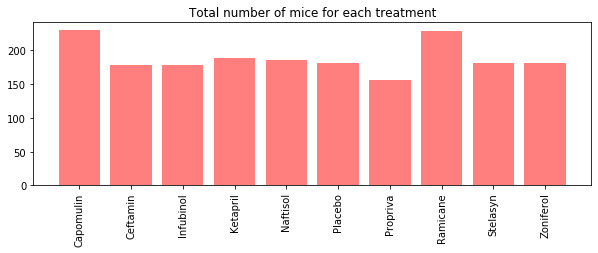

In [284]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Reset the index
indexed = mice_and_treatment.reset_index()

# Set x axis and tick locations
x_axis = np.arange(len(indexed))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,3))
plt.bar(x_axis, indexed["Mouse ID"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, indexed["Drug Regimen"], rotation="vertical")

# Set a title for the chart
plt.title("Total number of mice for each treatment")

In [254]:
# Split up our data into groups based upon gender
gender_group = clean_data.groupby("Sex").count()["Mouse ID"]
gender_group

Sex
Female    930
Male      958
Name: Mouse ID, dtype: int64

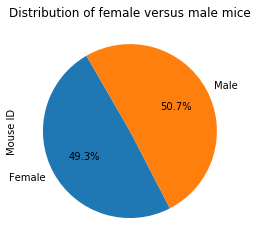

In [259]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_pandas = gender_group.plot.pie(y='Sex', figsize=(4, 4),autopct='%1.1f%%',startangle=120)
# plt.pie(gender_group,gender_group("Sex"),autopct='%1.1f%%')
plt.title('Distribution of female versus male mice')
plt.show()

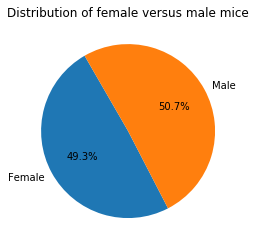

In [258]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Reset the index
indexed_gender = gender_group.reset_index()

gender = indexed_gender["Sex"]
percentage = indexed_gender["Mouse ID"]
plt.pie(percentage,labels=gender,autopct='%1.1f%%',startangle=120)
plt.title('Distribution of female versus male mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [288]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#https://stackoverflow.com/questions/15705630/get-the-rows-which-have-the-max-count-in-groups-using-groupby
greatest_timepoint = clean_data.loc[clean_data.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].idxmax()]
greatest_timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
309,b128,Capomulin,Female,9,22,45,38.982878,2
299,b742,Capomulin,Male,7,21,45,38.939633,0
64,f966,Capomulin,Male,16,17,20,30.485985,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
360,g316,Capomulin,Female,22,22,45,40.159220,2
...,...,...,...,...,...,...,...,...
1434,q633,Zoniferol,Male,12,25,45,70.827796,2
1518,s337,Zoniferol,Male,14,27,45,62.109651,4
1660,w140,Zoniferol,Female,19,30,5,47.717952,0
1719,w575,Zoniferol,Female,16,28,45,68.401286,3


In [313]:
# Capomulin
capomulin_quartiles = greatest_timepoint.loc[greatest_timepoint["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"].quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = upperq-lowerq

print(f"The lower quartile of Capomulin is: {capomulin_lowerq}")
print(f"The upper quartile of Capomulin is: {capomulin_upperq}")
print(f"The interquartile range of Capomulin is: {capomulin_iqr}")
print(f"The the median of Capomulin is: {capomulin_quartiles[0.5]} ")

capomulin_lower_bound = capomulin_lowerq - (1.5*iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*iqr)
print(f"Values below {capomulin_lower_bound} could be outliers.")
print(f"Values above {capomulin_upper_bound} could be outliers.")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [314]:
# Ramicane
ramicane_quartiles = greatest_timepoint.loc[greatest_timepoint["Drug Regimen"] == "Ramicane", "Tumor Volume (mm3)"].quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {ramicane_lowerq}")
print(f"The upper quartile of Ramicane is: {ramicane_upperq}")
print(f"The interquartile range of Ramicane is: {ramicane_iqr}")
print(f"The the median of Ramicane is: {ramicane_quartiles[0.5]} ")

ramicane_lower_bound = ramicane_lowerq - (1.5*iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*iqr)
print(f"Values below {ramicane_lower_bound} could be outliers.")
print(f"Values above {ramicane_upper_bound} could be outliers.")

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 7.781863460000004
The the median of Ramicane is: 36.56165229 
Values below 19.887674359999995 could be outliers.
Values above 52.33180146000001 could be outliers.


In [315]:
# Infubinol
infubinol_quartiles = greatest_timepoint.loc[greatest_timepoint["Drug Regimen"] == "Infubinol", "Tumor Volume (mm3)"].quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = upperq-lowerq

print(f"The lower quartile of Infubinol is: {infubinol_lowerq}")
print(f"The upper quartile of Infubinol is: {infubinol_upperq}")
print(f"The interquartile range of Infubinol is: {infubinol_iqr}")
print(f"The the median of Infubinol is: {infubinol_quartiles[0.5]} ")

infubinol_lower_bound = infubinol_lowerq - (1.5*iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*iqr)
print(f"Values below {infubinol_lower_bound} could be outliers.")
print(f"Values above {infubinol_upper_bound} could be outliers.")

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 7.781863460000004
The the median of Infubinol is: 60.16518046 
Values below 42.375812499999995 could be outliers.
Values above 77.19853804 could be outliers.


In [316]:
# Ceftamin
ceftamin_quartiles = greatest_timepoint.loc[greatest_timepoint["Drug Regimen"] == "Ceftamin", "Tumor Volume (mm3)"].quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin is: {ceftamin_lowerq}")
print(f"The upper quartile of Ceftamin is: {ceftamin_upperq}")
print(f"The interquartile range of Ceftamin is: {ceftamin_iqr}")
print(f"The the median of Ceftamin is: {ceftamin_quartiles[0.5]} ")

ceftamin_lower_bound = ceftamin_lowerq - (1.5*iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*iqr)
print(f"Values below {ceftamin_lower_bound} could be outliers.")
print(f"Values above {ceftamin_upper_bound} could be outliers.")

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 7.781863460000004
The the median of Ceftamin is: 59.85195552 
Values below 37.04928265999999 could be outliers.
Values above 75.97262522 could be outliers.


In [317]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

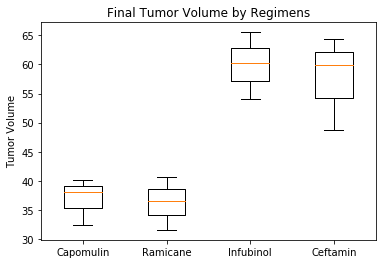

In [324]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
regimens_data = [capomulin_quartiles, ramicane_quartiles, infubinol_quartiles, ceftamin_quartiles]
fig1, ax1 = plt.subplots()
ax1.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax1.set_title('Final Tumor Volume by Regimens')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(regimens_data)
plt.show()

## Line and Scatter Plots

In [346]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Select a mouse that was treated with Capomulin
capomulin_mouse = clean_data.loc[clean_data["Mouse ID"] == "s185"]
capomulin_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


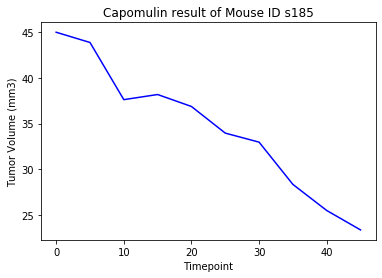

In [349]:
# Plot the line chart
x = capomulin_mouse["Timepoint"]
y = capomulin_mouse["Tumor Volume (mm3)"]


timepoint, = plt.plot(x, y, color="blue", label="World Average" )
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin result of Mouse ID s185")

# Show the chart
plt.show()

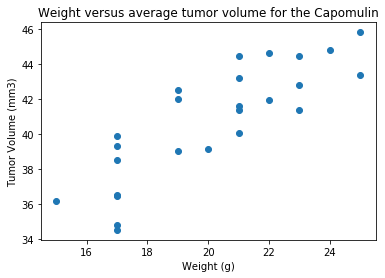

In [374]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_loc = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]

# Average tumor voulme of Capomulin 
ave_capomulin = capomulin_loc.groupby(["Mouse ID"]).mean()

plt.scatter(ave_capomulin["Weight (g)"] , ave_capomulin["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight versus average tumor volume for the Capomulin")

# Show the chart
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
